In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [728]:
board=[
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]
board=np.array(board)

In [712]:
def drawBoard(board):
    for i in range(15):
        for j in range(15):
            plt.plot((0,14),(i,i),'g')
            plt.plot((i,i),(0,14),'g')
            
        for i in range(15):
            for j in range(15):
                if board[i][j]==1:
                    plt.plot(i,j,'ro')
                elif board[i][j]==2:
                    plt.plot(i,j,'ko')
            
    plt.xlim(-0.5,14.5)
    plt.ylim(-0.5,14.5)
    plt.show()

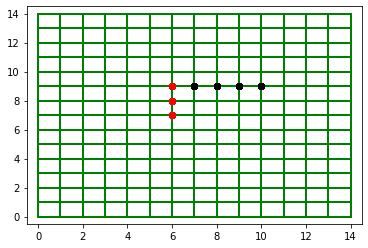

In [729]:
drawBoard(board)

In [714]:
from scipy import signal
convolveBoard=np.ones([3,3])
grad=signal.convolve2d(board,convolveBoard,mode='same',boundary='symm')
grad=(grad>0)^(board>0)

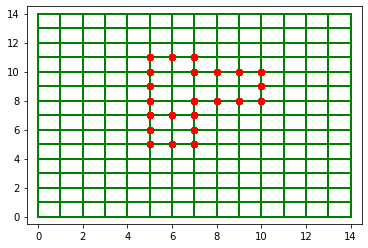

In [715]:
drawBoard(grad)

In [716]:
       
def Range(i,j):
    return (i>=0) & (i<15) & ( j >=0 ) & (j < 15)


def oneScore(board,xpos,ypos,player):
    # 5 500000
    # 4 1000
    # 3 500
    # 2 100
    # 1 10
    award=[0,10,100,500,1000]+[500000]*15
    count_direction=[[1,1],[1,0],[1,-1],[0,1]]
    count_container=[]

    for direction in count_direction:
        tempX=xpos
        tempY=ypos
        count = 0
        while Range(xpos,ypos):
            if board[xpos][ypos]==player:
                count+=1
                xpos+=direction[0]
                ypos+=direction[1]
            else:
                xpos=tempX
                ypos=tempY
                count_container.append(count)
                count=0
                break
                    
                    
        while Range(xpos,ypos):
            if board[xpos][ypos]==player:
                count+=1
                xpos+=-direction[0]
                ypos+=-direction[1]
            else:
                xpos=tempX
                ypos=tempY
                count_container.append(count)
                count=0
                break
                
                  

    count_container=np.array(count_container)
    award_container= [ count_container[2*i]+count_container[2*i+1] for i in range(4) ]
        
    award_container=np.array(award_container)-1
    for i in range(len(award_container)):
        if award_container[i]<0:
            award_container[i]=0
    award_container=[award[award_container[0]],award[award_container[1]],award[award_container[2]],award[award_container[3]]]

    Score=np.sum(award_container)
    
    return Score
        
        

        

In [717]:
boardScore(board,2)

1590

In [718]:
def boardScore(board,player):
    Sum=0
    for i in range(15):
        for j in range(15):
            Sum+=oneScore(board,i,j,player)
    return Sum

In [701]:
def totalScore(board):
    return boardScore(board,1)-boardScore(board,2)
    

In [733]:
def maxmini(board,depth,player):
    if depth==0:
        return totalScore(board),[]
    
    convolveBoard=np.ones([3,3])
    childBoard=signal.convolve2d(board,convolveBoard,mode='same',boundary='symm')
    childBoard=(childBoard>0)^(board>0)
    tempBoard=board.copy()
    childList=[]
    stepList=[]
    
    for i in range(15):
        for j in range(15):
            if childBoard[i][j]==True:
                ttp = tempBoard.copy()
                ttp[i][j]=player
                childList.append(ttp)
                stepList.append([i,j])

    if player == 1:
        bestValue=-1e30
        bestStep=[]
        for i,kidBoard in enumerate(childList):
            val= maxmini(kidBoard,depth-1,2)

            if bestValue<val[0]:
                bestValue=val[0]
                bestStep=stepList[i:i+1]+val[1]
        return bestValue,bestStep
    else:
        bestValue=1e30
        bestStep=[]
        for i,kidBoard in enumerate(childList):
            val= maxmini(kidBoard,depth-1,1)
            print(val)
            if bestValue>val[0]:
                bestValue=val[0]
                bestStep=stepList[i:i+1]+val[1]
        return bestValue,bestStep

    

In [725]:
maxmini(board,3,2)

(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-540, [])
(-540, [])
(-360, [])
(-360, [])
(-180, [])
(-2490, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-540, [])
(-540, [])
(-360, [])
(-360, [])
(-180, [])
(-2490, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-540, [])
(-540, [])
(-360, [])
(-360, [])
(-180, [])
(-2490, [])
(-180, [])
(0, [])
(-180, [])
(-180, [])
(-180, [])
(0, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, 

(-180, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-540, [])
(-540, [])
(-360, [])
(-360, [])
(-180, [])
(-2490, [])
(-180, [])
(180, [])
(0, [])
(0, [])
(0, [])
(180, [])
(0, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(0, [])
(0, [])
(180, [])
(180, [])
(180, [])
(180, [])
(-180, [])
(-180, [])
(180, [])
(-360, [])
(-360, [])
(-180, [])
(-180, [])
(0, [])
(-2310, [])
(0, [])
(180, [])
(180, [])
(180, [])
(360, [])
(180, [])
(360, [])
(360, [])
(360, [])
(360, [])
(180, [])
(180, [])
(360, [])
(360, [])
(360, [])
(360, [])
(0, [])
(0, [])
(360, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(180, [])
(-2130, [])
(180, [])
(180, [])
(180, [])
(180, [])
(360, [])
(360, [])
(180, [])
(180, [])
(360, [])
(360, [])
(360, [])
(180, [])
(180, [])
(360, [])
(360, [])
(360, [])
(360, [])
(0, [])
(0, [])
(360, [])
(-180, [])
(-180, [])
(0,

(0, [])
(0, [])
(180, [])
(180, [])
(180, [])
(180, [])
(0, [])
(0, [])
(180, [])
(180, [])
(180, [])
(180, [])
(0, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(-180, [])
(-180, [])
(180, [])
(-360, [])
(-360, [])
(-180, [])
(-180, [])
(0, [])
(-2310, [])
(0, [])
(0, [])
(0, [])
(0, [])
(180, [])
(180, [])
(0, [])
(0, [])
(180, [])
(180, [])
(180, [])
(180, [])
(0, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(-180, [])
(-180, [])
(180, [])
(-360, [])
(-360, [])
(-180, [])
(-180, [])
(0, [])
(-2310, [])
(0, [])
(2498300, [])
(2498300, [])
(2498300, [])
(2498480, [])
(2498300, [])
(2498300, [])
(2498480, [])
(2498480, [])
(2498480, [])
(2498480, [])
(2498480, [])
(2498480, [])
(2498480, [])
(2498480, [])
(2498120, [])
(2498120, [])
(2498480, [])
(2497940, [])
(2497940, [])
(2498120, [])
(2498120, [])
(2498300, [])
(2495990, [])
(2498300, [])
(2310, [])
(2310, [])
(2310, [])
(2490, [])
(2310, [])
(2310, [])
(2490, [])
(2490, [])
(2490, [])
(2490, [])
(2490, [])
(2310, 

(180, [])
(180, [])
(-180, [])
(-180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(-360, [])
(-360, [])
(-180, [])
(-180, [])
(0, [])
(-2310, [])
(0, [])
(180, [])
(180, [])
(180, [])
(360, [])
(360, [])
(180, [])
(180, [])
(360, [])
(360, [])
(360, [])
(180, [])
(360, [])
(360, [])
(360, [])
(0, [])
(0, [])
(360, [])
(360, [])
(360, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(180, [])
(-2130, [])
(180, [])
(180, [])
(180, [])
(180, [])
(360, [])
(360, [])
(180, [])
(180, [])
(360, [])
(360, [])
(360, [])
(180, [])
(360, [])
(360, [])
(360, [])
(360, [])
(0, [])
(360, [])
(360, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(180, [])
(-2130, [])
(180, [])
(180, [])
(180, [])
(180, [])
(360, [])
(360, [])
(180, [])
(180, [])
(360, [])
(360, [])
(360, [])
(180, [])
(360, [])
(360, [])
(360, [])
(360, [])
(0, [])
(360, [])
(-180, [])
(-180, [])
(360, [])
(0, [])
(0, [])
(180, [])
(-2130, [])
(180, [])
(0, [])
(0, [])
(0, [])
(180, [])
(180, [])
(0, [])
(0, [])
(180, [])
(180, [])
(180, [])
(0, 

(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-540, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-180, [])
(-2490, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(0, [])
(-540, [])
(-540, [])
(0, [])
(-360, [])
(0, [])
(-180, [])
(-2490, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-540, [])
(-540, [])
(0, [])
(-360, [])
(0, [])
(-180, [])
(-2490, [])
(-180, [])
(0, [])
(-180, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-540, [])
(-540, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-2490, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-180,

(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-540, [])
(-540, [])
(-360, [])
(-360, [])
(-180, [])
(-2490, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-540, [])
(-540, [])
(-360, [])
(-360, [])
(-180, [])
(-2490, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-540, [])
(-540, [])
(-360, [])
(-360, [])
(-180, [])
(-2490, [])
(-180, [])
(180, [])
(180, [])
(180, [])
(0, [])
(0, [])
(0, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(0, [])
(0, [])
(180, [])
(180, [])
(180, [])
(0, [])


(0, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(0, [])
(180, [])
(180, [])
(0, [])
(0, [])
(0, [])
(180, [])
(-180, [])
(-180, [])
(180, [])
(-360, [])
(-360, [])
(-180, [])
(-180, [])
(0, [])
(-2310, [])
(0, [])
(360, [])
(360, [])
(360, [])
(180, [])
(180, [])
(180, [])
(360, [])
(360, [])
(360, [])
(360, [])
(180, [])
(360, [])
(360, [])
(180, [])
(180, [])
(180, [])
(360, [])
(0, [])
(0, [])
(360, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(180, [])
(-2130, [])
(180, [])
(360, [])
(360, [])
(360, [])
(180, [])
(180, [])
(180, [])
(360, [])
(360, [])
(360, [])
(360, [])
(180, [])
(360, [])
(360, [])
(180, [])
(180, [])
(180, [])
(360, [])
(0, [])
(0, [])
(360, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(180, [])
(-2130, [])
(180, [])
(540, [])
(540, [])
(540, [])
(360, [])
(360, [])
(360, [])
(540, [])
(540, [])
(540, [])
(540, [])
(360, [])
(540, [])
(540, [])
(360, [])
(360, [])
(360, [])
(540, [])
(180, [])
(180, [])
(540, [])
(0, [])
(0, [])
(180, [])
(180, [])
(360, []

(1950, [])
(2130, [])
(2130, [])
(2310, [])
(0, [])
(2310, [])
(180, [])
(0, [])
(0, [])
(0, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(0, [])
(0, [])
(-1470, [])
(-180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(-360, [])
(-360, [])
(-180, [])
(-180, [])
(0, [])
(-2310, [])
(0, [])
(180, [])
(0, [])
(0, [])
(0, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(0, [])
(-1470, [])
(-180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(-360, [])
(-360, [])
(-180, [])
(-180, [])
(0, [])
(-2310, [])
(0, [])
(360, [])
(180, [])
(180, [])
(180, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(180, [])
(-1290, [])
(0, [])
(360, [])
(360, [])
(360, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(180, [])
(-2130, [])
(180, [])
(360, [])
(180, [])
(180, [])
(180, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(180, [])
(180, [])
(0, [])
(360, [])
(360, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(180, [])
(-2130, [])
(180, [

(-2490, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-1650, [])
(-180, [])
(-180, [])
(-540, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-180, [])
(-2490, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-1650, [])
(-180, [])
(-180, [])
(0, [])
(-540, [])
(-540, [])
(0, [])
(-360, [])
(0, [])
(-180, [])
(-2490, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-1650, [])
(-180, [])
(-180, [])
(-540, [])
(-540, [])
(0, [])
(-360, [])
(0, [])
(-180, [])
(-2490, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-1650, [])
(-180, [])
(-180, [])
(-540, [])
(-540, [])
(0, [])
(-360,

(-180, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-180, [])
(-180, [])
(-180, [])
(-540, [])
(-540, [])
(0, [])
(-360, [])
(0, [])
(-180, [])
(-2490, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-180, [])
(-180, [])
(-180, [])
(-540, [])
(-540, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-2490, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-180, [])
(-180, [])
(-180, [])
(-540, [])
(-540, [])
(-360, [])
(-360, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-180, [])
(-180, [])
(-180, [])
(-540, [])
(-540, [])
(-360, []

(-1470, [])
(-180, [])
(180, [])
(0, [])
(0, [])
(-1650, [])
(-360, [])
(-180, [])
(-180, [])
(0, [])
(-2310, [])
(0, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(180, [])
(360, [])
(360, [])
(180, [])
(-1290, [])
(0, [])
(360, [])
(180, [])
(180, [])
(-1470, [])
(-180, [])
(0, [])
(0, [])
(180, [])
(-2130, [])
(180, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(180, [])
(360, [])
(360, [])
(180, [])
(-1290, [])
(0, [])
(360, [])
(180, [])
(180, [])
(-1470, [])
(-180, [])
(0, [])
(0, [])
(180, [])
(-2130, [])
(180, [])
(540, [])
(540, [])
(540, [])
(540, [])
(540, [])
(540, [])
(540, [])
(540, [])
(540, [])
(540, [])
(360, [])
(540, [])
(540, [])
(360, [])
(-1110, [])
(180, [])
(540, [])
(360, [])
(360, [])
(-1290, [])
(0, [])
(180, [])
(180, [])
(360, [])
(-1950, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(360, [])
(3

(2130, [])
(2130, [])
(2130, [])
(2130, [])
(2130, [])
(840, [])
(2130, [])
(2130, [])
(2130, [])
(840, [])
(660, [])
(2130, [])
(2130, [])
(1950, [])
(1410, [])
(1590, [])
(1770, [])
(660, [])
(1950, [])
(-360, [])
(1950, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-1470, [])
(-180, [])
(-180, [])
(-180, [])
(-1470, [])
(-1650, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-360, [])
(-900, [])
(-720, [])
(-540, [])
(-1650, [])
(-360, [])
(-2670, [])
(-360, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-1470, [])
(-180, [])
(-180, [])
(-1470, [])
(-1650, [])
(-180, [])
(-180, [])
(-180, [])
(-360, [])
(-900, [])
(-720, [])
(-540, [])
(-1650, [])
(-360, [])
(-2670, [])
(-360, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-1290, [])
(0, [])
(0, [])
(0, [])
(-1470, [])
(0, [])
(0, [])
(-180, [])
(-720, [])
(-540, [])
(-360, [])
(-1470, [])
(-180, [])
(-2490,

(-540, [])
(-1830, [])
(-720, [])
(-360, [])
(-540, [])
(-2850, [])
(-540, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-1650, [])
(-360, [])
(-360, [])
(-360, [])
(-1830, [])
(-1650, [])
(-360, [])
(-900, [])
(-1080, [])
(-360, [])
(-1830, [])
(-720, [])
(-360, [])
(-360, [])
(-540, [])
(-2850, [])
(-540, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-1650, [])
(-360, [])
(-360, [])
(-360, [])
(-1830, [])
(-1650, [])
(-360, [])
(-900, [])
(-1080, [])
(-540, [])
(-360, [])
(-720, [])
(-360, [])
(-540, [])
(-2850, [])
(-540, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-1650, [])
(-360, [])
(-360, [])
(-360, [])
(-1830, [])
(-1650, [])
(-900, [])
(-1080, [])
(-540, [])
(-1830, [])
(-360, [])
(-540, [])
(-2850, [])
(-540, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-

(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-1650, [])
(-180, [])
(-540, [])
(-1830, [])
(-180, [])
(-180, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-2490, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-1650, [])
(-180, [])
(-540, [])
(-1830, [])
(-180, [])
(-180, [])
(-360, [])
(-360, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-180, [])
(-180, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-1650, [])
(-180, [])
(-540, [])
(-1830, [])
(-180, [])
(-180, [])
(-360, [])
(-360, [])
(0, [])
(-180, [])
(-2490, [])
(0, [])
(0, [])
(0, [])
(0, [])
(2495990, [[6, 7], [10, 9]])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-1650, [])
(-900, [])
(-720, [])
(-36

(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-360, [])
(-720, [])
(-900, [])
(-1650, [])
(-2010, [])
(-1650, [])
(-720, [])
(-900, [])
(-1650, [])
(-1650, [])
(-2850, [])
(-540, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-540, [])
(-720, [])
(-1470, [])
(-1830, [])
(-1470, [])
(-540, [])
(-720, [])
(-1470, [])
(-1470, [])
(-2670, [])
(-360, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-540, [])
(-720, [])
(-1470, [])
(-1830, [])
(-1470, [])
(-540, [])
(-720, [])
(-1470, [])
(-1470, [])
(-2670, [])
(-360, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-540, [])
(-1290, [])
(-1650, [])
(-1290, [])
(-360, [])
(-540, [])
(-1290, [])


(-2670, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-540, [])
(-1650, [])
(-180, [])
(-360, [])
(-900, [])
(-720, [])
(-1470, [])
(-1650, [])
(-1470, [])
(-540, [])
(-2850, [])
(-360, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-540, [])
(-1650, [])
(-180, [])
(-360, [])
(-900, [])
(-720, [])
(-1470, [])
(-1650, [])
(-1470, [])
(-540, [])
(-2850, [])
(-360, [])
(2498120, [])
(2498120, [])
(2498120, [])
(2498120, [])
(2498120, [])
(2498120, [])
(2498120, [])
(2498120, [])
(2498120, [])
(2498120, [])
(2498120, [])
(2498120, [])
(2497760, [])
(2496650, [])
(2498120, [])
(2497940, [])
(2497400, [])
(2497580, [])
(2496830, [])
(2496650, [])
(2496830, [])
(2497760, [])
(2495450, [])
(2497940, [])
(2130, [])
(213

(2130, [])
(2130, [])
(2130, [])
(2130, [])
(2130, [])
(2130, [])
(2130, [])
(2130, [])
(2130, [])
(2130, [])
(2130, [])
(660, [])
(1770, [])
(2130, [])
(2130, [])
(1590, [])
(1410, [])
(1950, [])
(660, [])
(840, [])
(1950, [])
(-540, [])
(1770, [])
(840, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-1650, [])
(-540, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-720, [])
(-900, [])
(-360, [])
(-1650, [])
(-1470, [])
(-360, [])
(-2850, [])
(-540, [])
(-1470, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-1650, [])
(-540, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-720, [])
(-900, [])
(-360, [])
(-1650, [])
(-1470, [])
(-360, [])
(-2850, [])
(-540, [])
(-1470, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-1470, [])
(-360,

(180, [])
(-180, [])
(-180, [])
(180, [])
(180, [])
(180, [])
(-360, [])
(-1470, [])
(0, [])
(-360, [])
(-180, [])
(0, [])
(-2490, [])
(0, [])
(-1110, [])
(0, [])
(0, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(-180, [])
(180, [])
(180, [])
(-360, [])
(-1470, [])
(0, [])
(-360, [])
(-180, [])
(0, [])
(-2490, [])
(0, [])
(-1110, [])
(0, [])
(0, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(-180, [])
(180, [])
(-360, [])
(-1470, [])
(180, [])
(0, [])
(-360, [])
(-180, [])
(0, [])
(-2490, [])
(0, [])
(-1110, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-540, [])
(-1650, [])
(0, [])
(0, [])
(-180, [])
(-540, [])
(-360, [])
(-180, [])
(-2670, [])
(-180, [])
(-1290, [])
(-180, [])
(-180, [])
(-180, 

(-2310, [])
(-2310, [])
(-2310, [])
(-2310, [])
(-2670, [])
(-2670, [])
(-2310, [])
(-2310, [])
(-2310, [])
(-2310, [])
(-2850, [])
(-2850, [])
(-2850, [])
(-2850, [])
(-2670, [])
(-2670, [])
(-2490, [])
(-2498300, [])
(-2490, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2490, [])
(-2490, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2670, [])
(-2670, [])
(-2670, [])
(-2670, [])
(-2490, [])
(-2490, [])
(-2310, [])
(-2498120, [])
(-2310, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2490, [])
(-2130, [])
(-2130, [])
(-2670, [])
(-2670, [])
(-2670, [])
(-2670, [])
(-2490, [])
(-2490, [])
(-2310, [])
(-2498120, [])
(-2310, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130, [])
(-2130,

(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(-180, [])
(180, [])
(180, [])
(-1470, [])
(-360, [])
(-180, [])
(-360, [])
(0, [])
(0, [])
(-2490, [])
(0, [])
(0, [])
(0, [])
(-1110, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(180, [])
(-180, [])
(180, [])
(-1470, [])
(-360, [])
(180, [])
(-180, [])
(-360, [])
(0, [])
(0, [])
(-2490, [])
(0, [])
(0, [])
(0, [])
(-1110, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-1650, [])
(-540, [])
(0, [])
(0, [])
(-360, [])
(-540, [])
(-180, [])
(-180, [])
(-2670, [])
(-180, [])
(-180, [])
(-180, [])
(-1290, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-180, [])
(-540, [])
(-540, [])
(-180, [])
(-

(0, [[6, 7], [6, 11], [10, 9]])

In [731]:
maxmini(board,2,1)

(-2350, [])
(-2350, [])
(-2350, [])
(-2350, [])
(-2350, [])
(-2350, [])
(-2350, [])
(-2350, [])
(-2350, [])
(-2350, [])
(-2530, [])
(-2350, [])
(-2350, [])
(-2710, [])
(-2710, [])
(-2890, [])
(-2890, [])
(-2890, [])
(-2890, [])
(-2710, [])
(-2710, [])
(-2530, [])
(-2498340, [])
(-2530, [])
(-2170, [])
(-2170, [])
(-2170, [])
(-2170, [])
(-2170, [])
(-2170, [])
(-2170, [])
(-2170, [])
(-2350, [])
(-2170, [])
(-2170, [])
(-2530, [])
(-2530, [])
(-2710, [])
(-2710, [])
(-2710, [])
(-2710, [])
(-2530, [])
(-2530, [])
(-2350, [])
(-2498160, [])
(-2350, [])
(-1990, [])
(-1990, [])
(-1990, [])
(-1990, [])
(-1990, [])
(-1990, [])
(-1990, [])
(-1990, [])
(-2170, [])
(-1990, [])
(-1990, [])
(-2350, [])
(-2350, [])
(-2530, [])
(-2530, [])
(-2530, [])
(-2530, [])
(-2350, [])
(-2350, [])
(-2170, [])
(-2497980, [])
(-2170, [])
(-2170, [])
(-2170, [])
(-2170, [])
(-2170, [])
(-2170, [])
(-2170, [])
(-2170, [])
(-2170, [])
(-2350, [])
(-2170, [])
(-2170, [])
(-2530, [])
(-2530, [])
(-2710, [])
(-2710,

(-3070, [[11, 9], [8, 8]])

In [726]:
maxmini(board,1,2)

(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(0, [])
(-360, [])
(-360, [])
(0, [])
(-540, [])
(-540, [])
(-360, [])
(-360, [])
(-180, [])
(-2490, [])
(-180, [])


(-2490, [[10, 9]])